In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
# Function to fetch stock data
def fetch_stock_data(ticker, start, end):
    stock_data = yf.download(ticker, start=start, end=end)
    stock_data.dropna(inplace=True)
    return stock_data

In [14]:
# Function to visualize stock price trends
def plot_stock_trends(stock_data, ticker):
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Close'], label=f'{ticker} Closing Price')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(f'{ticker} Stock Price Trend')
    plt.legend()
    plt.show()

In [15]:
# Function to calculate volatility
def analyze_volatility(stock_data):
    stock_data['Volatility'] = stock_data['Close'].rolling(window=20).std()
    plt.figure(figsize=(12,6))
    plt.plot(stock_data['Volatility'], label='Volatility', color='red')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.title('Stock Price Volatility')
    plt.legend()
    plt.show()
    return stock_data

In [16]:
# Function to calculate RSI
def calculate_rsi(stock_data, period=14):
    delta = stock_data['Close'].diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    stock_data['RSI'] = 100 - (100 / (1 + rs))
    return stock_data

In [17]:
# Function to identify correlations with market indices
def analyze_correlations(stock_data, index_data):
    combined_data = stock_data[['Close']].rename(columns={'Close': 'Stock'})
    combined_data['Index'] = index_data['Close']
    correlation = combined_data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Stock Price Correlation with Market Index')
    plt.show()

In [18]:
# Feature Engineering
def create_features(stock_data):
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()
    stock_data['Volume_Trend'] = stock_data['Volume'].pct_change()
    stock_data = calculate_rsi(stock_data)
    stock_data.dropna(inplace=True)
    return stock_data

In [19]:
# Prepare data for machine learning
def prepare_ml_data(stock_data):
    stock_data['Target'] = stock_data['Close'].shift(-1)
    stock_data.dropna(inplace=True)
    features = ['Open', 'High', 'Low', 'Volume', 'SMA_50', 'SMA_200', 'Volatility', 'Volume_Trend', 'RSI']
    X = stock_data[features]
    y = stock_data['Target']
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Train and evaluate models
def train_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
    }
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        mae = mean_absolute_error(y_test, predictions)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        results[name] = {'MAE': mae, 'RMSE': rmse}
        print(f'{name} - MAE: {mae}, RMSE: {rmse}')
    return models, results

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


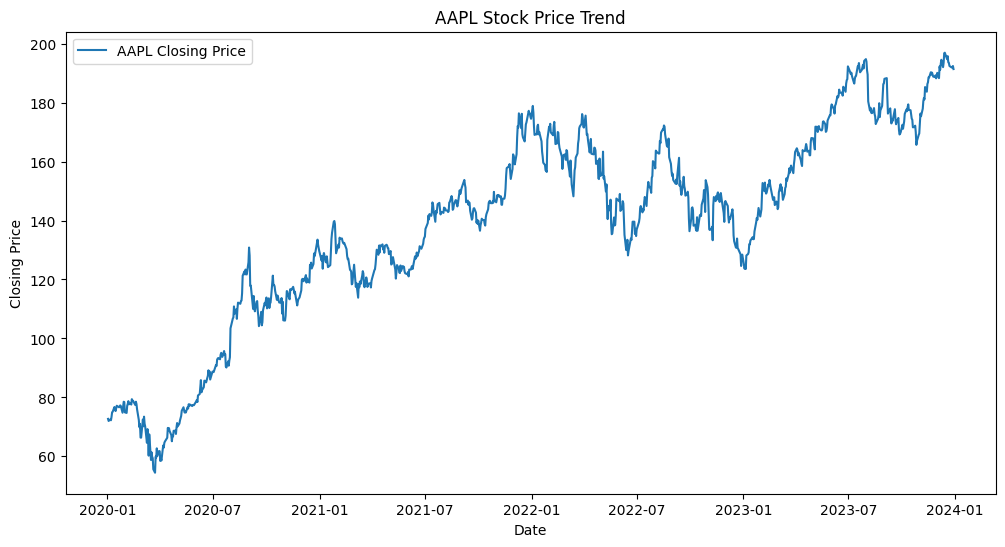

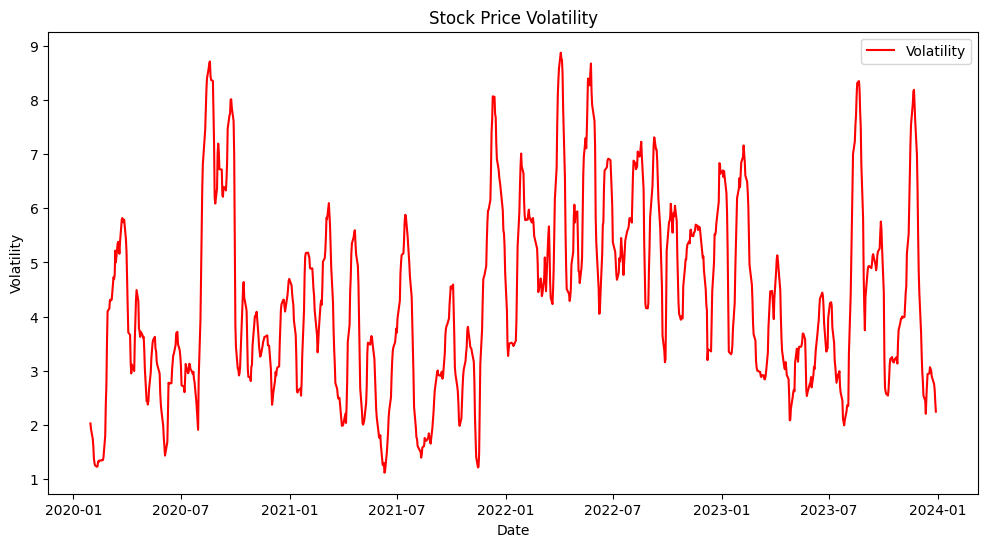

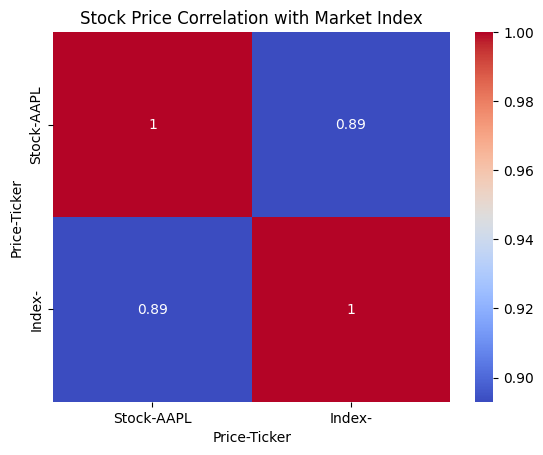

Linear Regression - MAE: 2.318303487440326, RMSE: 2.93358293478663
Random Forest - MAE: 2.3528845167748713, RMSE: 3.0488619110405035
Predicted Future Price: 146.21684524536133

Summary of Analysis:
1. Stock trends and volatility were analyzed using standard deviation and visualization.
2. The stock showed correlation with market indices, as visualized in the heatmap.
3. RSI and Volume Trends were used as new features for prediction.
4. Random Forest performed better than Linear Regression in predicting stock prices.


In [21]:
# Main execution
if __name__ == "__main__":
    ticker = 'AAPL'  # Example: Apple stock
    index_ticker = '^GSPC'  # S&P 500 index
    start_date = '2020-01-01'
    end_date = '2024-01-01'
    
    stock_data = fetch_stock_data(ticker, start_date, end_date)
    index_data = fetch_stock_data(index_ticker, start_date, end_date)
    
    plot_stock_trends(stock_data, ticker)
    stock_data = analyze_volatility(stock_data)
    analyze_correlations(stock_data, index_data)
    stock_data = create_features(stock_data)
    
    X_train, X_test, y_train, y_test = prepare_ml_data(stock_data)
    models, results = train_models(X_train, X_test, y_train, y_test)
    
    # Predict future prices
    future_prediction = models['Random Forest'].predict([X_test.iloc[-1]])
    print(f'Predicted Future Price: {future_prediction[0]}')
    
    # Summary of findings
    print("\nSummary of Analysis:")
    print("1. Stock trends and volatility were analyzed using standard deviation and visualization.")
    print("2. The stock showed correlation with market indices, as visualized in the heatmap.")
    print("3. RSI and Volume Trends were used as new features for prediction.")
    print("4. Random Forest performed better than Linear Regression in predicting stock prices.")